In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir = "//content/drive/MyDrive/Assignment_HOOM/"

In [4]:
df = pd.read_csv(dir + 'GDPC1.csv')
df

,DATE,GDPC1
0,2000-01-01,12935.252
1,2000-04-01,13170.749
2,2000-07-01,13183.890
3,2000-10-01,13262.250
4,2001-01-01,13219.251
...,...,...
85,2021-04-01,19368.310
86,2021-07-01,19478.893
87,2021-10-01,19806.290
88,2022-01-01,19727.918


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    90 non-null     object 
 1   GDPC1   90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [7]:
df.isnull().sum()

DATE     0
GDPC1    0
dtype: int64

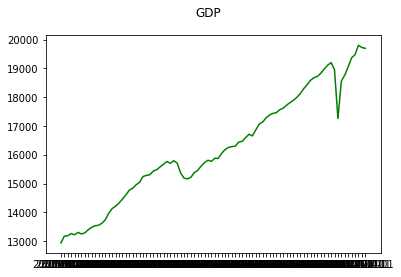

In [8]:
plt.plot(df['DATE'], df['GDPC1'], "g-")

plt.suptitle("GDP")
plt.show()

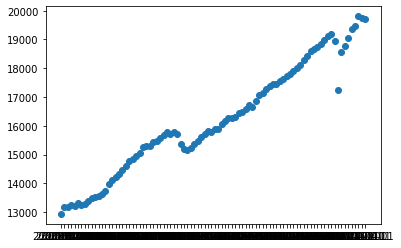

In [9]:
plt.scatter(df.DATE, df.GDPC1)
plt.show()

In [10]:
from scipy import stats
import numpy as np
df[(np.abs(stats.zscore(df['GDPC1'])) > 3)]

,DATE,GDPC1


In [11]:
'''q_low = df["GDPC1"].quantile(0.01)
q_hi  = df["GDPC1"].quantile(0.99)
print(q_low, q_hi)

df_outlier = df[(df["GDPC1"] > q_hi) | (df["GDPC1"] < q_low) ]
df_outlier'''

13144.84433 19736.538920000003


,DATE,GDPC1
0,2000-01-01,12935.252
87,2021-10-01,19806.290


In [22]:
average = df.groupby(pd.PeriodIndex(df['DATE'], freq = "M"))['GDPC1'].mean()
average = average.to_frame()
average

,GDPC1
DATE,
2000-01,12935.252
2000-04,13170.749
2000-07,13183.890
2000-10,13262.250
2001-01,13219.251
...,...
2021-04,19368.310
2021-07,19478.893
2021-10,19806.290


In [23]:
average.reset_index(inplace = True)

In [24]:
average['DATE'] = average['DATE'].astype(str)
average['DATE'] = pd.to_datetime(average['DATE'])

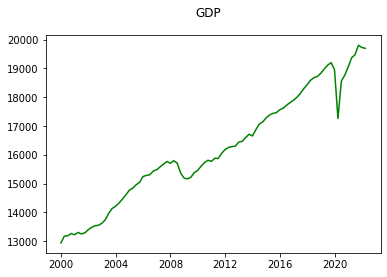

In [25]:
plt.plot(average['DATE'], average['GDPC1'], "g-")

plt.suptitle("GDP")
plt.show()

In [26]:
average.set_index(['DATE'],inplace = True)
average

,GDPC1
DATE,
2000-01-01,12935.252
2000-04-01,13170.749
2000-07-01,13183.890
2000-10-01,13262.250
2001-01-01,13219.251
...,...
2021-04-01,19368.310
2021-07-01,19478.893
2021-10-01,19806.290


In [27]:
average.to_csv('gdp_final.csv')